# All distances within a selection

Here we calculate the distance of every atom to every other atom in a selection, and show how we can extend this to residues.

**Last updated:** December 2022 with MDAnalysis 2.4.0-dev0

**Minimum version of MDAnalysis:** 0.19.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests
   
**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)



In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PDB_small
from MDAnalysis.analysis import distances

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
# suppress some MDAnalysis warnings when writing PDB files
warnings.filterwarnings('ignore')

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>)

In [2]:
u = mda.Universe(PDB_small)

## Calculating atom-wise distances

We begin by selecting the alpha-carbons of the protein.

In [3]:
ca = u.select_atoms('name CA')
n_ca = len(ca)
n_ca

214

When given an array with $n$ positions, `distances.self_distance_array` ([API docs](https://docs.mdanalysis.org/stable/documentation_pages/analysis/distances.html#MDAnalysis.analysis.distances.self_distance_array)) returns the distances in a flat vector with length $\frac{n(n-1)}{2}$. These correspond to the flattened upper triangular values of a square distance matrix.

In [4]:
self_distances = distances.self_distance_array(ca.positions)
self_distances.shape

(22791,)

We can convert this into a more easily interpreted square distance array. First we create an all-zero square array and get the indices of the upper and lower triangular matrices.

In [5]:
sq_dist_arr = np.zeros((n_ca, n_ca))
triu = np.triu_indices_from(sq_dist_arr, k=1)

Then we simply assign the calculated distances to the upper and lower triangular positions.

In [6]:
sq_dist_arr[triu] = self_distances
sq_dist_arr.T[triu] = self_distances

### Plotting

Text(0, 0.5, 'Distance (Angstrom)')

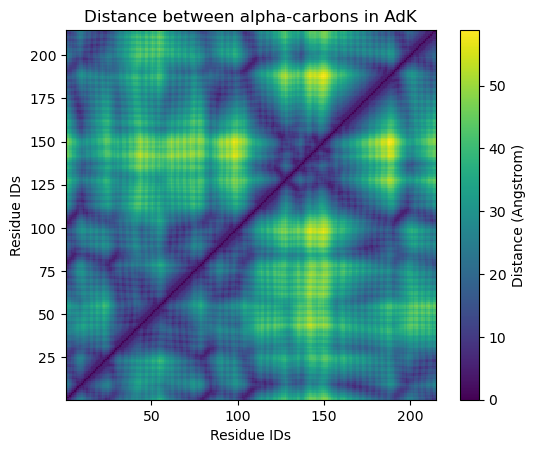

In [7]:
fig, ax = plt.subplots()
im = ax.pcolor(ca.resids, ca.resids, sq_dist_arr)

# plt.pcolor gives a rectangular grid by default
# so we need to make our heatmap square
ax.set_aspect('equal')

# add figure labels and titles
plt.ylabel('Residue IDs')
plt.xlabel('Residue IDs')
plt.title('Distance between alpha-carbons in AdK')

# colorbar
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')

## Calculating distances for each residue

Instead of calculating the distance between the alpha-carbon of each residue, we could look at the distances between the centers-of-mass instead. The process is very similar to the atom-wise distances above, but we have to pass `distances.self_distance_array` an array of residue center-of-mass coordinates instead.

In [8]:
res_com = u.atoms.center_of_mass(compound='residues')
n_res = len(res_com)
n_res

214

As the number of residues remains the same, the resulting distances array has the same length.

In [9]:
res_dist = distances.self_distance_array(res_com)
res_dist.shape

(22791,)

This means we don't need to re-define `triu`.

In [10]:
sq_dist_res = np.zeros((n_res, n_res))
sq_dist_res[triu] = res_dist
sq_dist_res.T[triu] = res_dist

### Plotting

The resulting plot looks pretty similar.

Text(0, 0.5, 'Distance (Angstrom)')

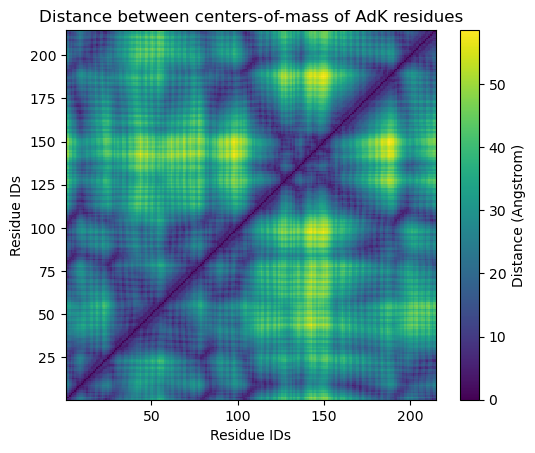

In [11]:
fig2, ax2 = plt.subplots()
im2 = ax2.pcolor(u.residues.resids, u.residues.resids, sq_dist_res)

# plt.pcolor gives a rectangular grid by default
# so we need to make our heatmap square
ax2.set_aspect('equal')

# add figure labels and titles
plt.ylabel('Residue IDs')
plt.xlabel('Residue IDs')
plt.title('Distance between centers-of-mass of AdK residues')

# colorbar
cbar2 = fig2.colorbar(im2)
cbar2.ax.set_ylabel('Distance (Angstrom)')

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.